In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [48]:
listings = pd.read_csv('/Users/saurabh/Documents/PythonData/listings.csv')

Let's take a look at the data

In [49]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 16 columns):
id                                4804 non-null int64
name                              4804 non-null object
host_id                           4804 non-null int64
host_name                         4776 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     4804 non-null object
latitude                          4804 non-null float64
longitude                         4804 non-null float64
room_type                         4804 non-null object
price                             4804 non-null int64
minimum_nights                    4804 non-null int64
number_of_reviews                 4804 non-null int64
last_review                       4396 non-null object
reviews_per_month                 4381 non-null float64
calculated_host_listings_count    4804 non-null int64
availability_365                  4804 non-null int64
dtypes: float64(4),

In [4]:
listings.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.769310,-122.433856,Entire home/apt,170,1,127,2018-02-26,1.21,1,106
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.745112,-122.421018,Entire home/apt,235,30,112,2017-08-06,1.04,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.766690,-122.452505,Private room,65,32,17,2016-11-21,0.16,7,365
3,8014,Newly Remodeled room in big house WIFI market,22402,Jia,NaN,Outer Mission,37.730746,-122.448409,Private room,60,3,76,2018-02-16,1.12,3,37
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.764872,-122.451828,Private room,65,32,7,2017-08-12,0.16,7,365
5,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.775249,-122.436374,Entire home/apt,575,5,26,2017-11-10,0.25,2,89
6,8567,Lovely 2BR flat Great Location,25601,Sandy,NaN,Western Addition,37.784707,-122.445554,Entire home/apt,255,2,27,2017-08-12,0.26,1,21
7,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.759189,-122.422367,Private room,139,1,559,2018-02-27,9.98,2,133
8,8775,Hidden gem in Mission district,27037,Matt,NaN,Mission,37.751740,-122.409421,Entire home/apt,285,3,24,2017-12-03,0.27,1,53
9,9225,Artful Potrero Separate Floor with Garden,29674,Gae,NaN,Potrero Hill,37.762589,-122.405431,Private room,135,1,386,2018-01-30,3.79,1,325


In [37]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.804000e+03,4.804000e+03,0.0,4804.000000,4804.000000,4804.000000,4.804000e+03,4804.000000,4381.000000,4804.000000,4804.000000
mean,1.125361e+07,3.357978e+07,NaN,37.763546,-122.432606,222.415903,2.082392e+04,49.912781,2.351408,3.766861,137.558493
std,7.709818e+06,4.601828e+07,NaN,0.022875,0.026804,375.445072,1.442775e+06,68.268786,3.304190,8.083173,124.338291
min,9.580000e+02,4.600000e+01,NaN,37.704783,-122.511500,0.000000,1.000000e+00,0.000000,0.020000,1.000000,0.000000
25%,3.812677e+06,3.052907e+06,NaN,37.748104,-122.445195,100.000000,1.000000e+00,6.000000,0.600000,1.000000,26.000000
50%,1.090908e+07,1.133110e+07,NaN,37.763194,-122.428219,150.000000,2.000000e+00,23.000000,1.610000,1.000000,89.000000
75%,1.855375e+07,4.414355e+07,NaN,37.781353,-122.412448,250.000000,4.000000e+00,66.000000,3.330000,3.000000,254.250000
max,2.359468e+07,1.762662e+08,NaN,37.810306,-122.370427,10000.000000,1.000000e+08,568.000000,110.080000,53.000000,365.000000


In [38]:
listings.groupby('room_type').describe()

availability_365                                            \
                           count        mean         std  min   25%    50%   
room_type                                                                    
Entire home/apt           2763.0  128.499457  121.266451  0.0  19.0   84.0   
Private room              1946.0  150.465057  128.219787  0.0  36.0  102.5   
Shared room                 95.0  136.652632  108.681437  0.0  43.5  126.0   

                               calculated_host_listings_count             \
                    75%    max                          count       mean   
room_type                                                                  
Entire home/apt  234.50  365.0                         2763.0   2.673905   
Private room     278.75  365.0                         1946.0   4.969681   
Shared room      179.00  365.0                           95.0  10.915789   

                  ...    price          reviews_per_month                      \
                  ...      75%      max             count      mean       std   
room_type         ...                                                           
Entire home/apt   ...    320.0  10000.0            2573.0  2.001030  2.484366   
Private room      ...    135.0   8000.0            1721.0  2.861127  4.239554   
Shared room       ...     55.0   2474.0              87.0  2.630690  1.738926   

                                                   
                  min    25%   50%    75%     max  
room_type                                          
Entire home/apt  0.02  0.490  1.31  2.910   68.57  
Private room     0.02  0.870  2.10  3.800  110.08  
Shared room      0.02  1.545  2.34  3.815    8.67  

[3 rows x 88 columns]

In [59]:
listings_temp = listings
listings_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 16 columns):
id                                4804 non-null int64
name                              4804 non-null object
host_id                           4804 non-null int64
host_name                         4776 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     4804 non-null object
latitude                          4804 non-null float64
longitude                         4804 non-null float64
room_type                         4804 non-null object
price                             4804 non-null int64
minimum_nights                    4804 non-null int64
number_of_reviews                 4804 non-null int64
last_review                       4396 non-null object
reviews_per_month                 4381 non-null float64
calculated_host_listings_count    4804 non-null int64
availability_365                  4804 non-null int64
dtypes: float64(4),

In [92]:
listings_test = listings_temp.groupby(['neighbourhood','room_type']).sum().sort_values([('minimum_nights')], ascending=False)
listings_test

id      host_id  \
neighbourhood         room_type                                  
Noe Valley            Private room      761848391   1481638132   
Mission               Entire home/apt  2651861055   5328258244   
                      Private room     2168537394   4199391283   
Pacific Heights       Entire home/apt   960906388   2380569149   
Potrero Hill          Entire home/apt  1057594198   3022089208   
Western Addition      Entire home/apt  2181484972   6493352545   
Noe Valley            Entire home/apt  1421079186   2726730482   
Castro/Upper Market   Entire home/apt  1959345271   4800667525   
South of Market       Entire home/apt  1767963461   5176941382   
Bernal Heights        Entire home/apt  1828765103   3997800653   
Chinatown             Shared room        31859929    128030032   
Haight Ashbury        Entire home/apt   910324786   2516609437   
Marina                Entire home/apt   763747459   2624885205   
Downtown/Civic Center Entire home/apt  1208007298   3534509792   
North Beach           Entire home/apt   589326044   1821802306   
Nob Hill              Entire home/apt  1101346106   4263268425   
Inner Richmond        Entire home/apt  1067266453   3277905006   
Downtown/Civic Center Private room     3063377711  15555877920   
Russian Hill          Entire home/apt   852011774   2825603163   
Nob Hill              Private room      530797925   1990481468   
Western Addition      Private room     1667768251   5851035381   
Bernal Heights        Private room     1212618608   2207878052   
Excelsior             Private room      620369764   1767013495   
Inner Richmond        Private room      946660667   2988174379   
Castro/Upper Market   Private room     1109437276   2984617221   
Outer Sunset          Entire home/apt  1537815068   5327448592   
Bayview               Private room     1110319568   2723164633   
South of Market       Private room     1333781883   3588924792   
Outer Richmond        Entire home/apt   634767402   2406290894   
Financial District    Private room      320601982   1367222920   
...                                           ...          ...   
Mission               Shared room        78413844     19021403   
South of Market       Shared room       100090987    127920452   
Marina                Private room      276505584    789575037   
Seacliff              Private room      112753443    303679609   
Lakeshore             Private room      180634337    904835106   
Visitacion Valley     Entire home/apt   401804379   1420145242   
Noe Valley            Shared room        29582640    150093422   
Visitacion Valley     Private room      317450015   1017066295   
Chinatown             Private room      162199991       851320   
Crocker Amazon        Private room      234023275   1186195276   
Castro/Upper Market   Shared room         1408281      1753794   
Glen Park             Private room      214348555    597657888   
Diamond Heights       Private room       83418189    194645240   
                      Entire home/apt    70728640    130251337   
Crocker Amazon        Shared room       144435577    153584494   
Financial District    Shared room        92425640     10558105   
North Beach           Shared room        87331078    321040300   
Lakeshore             Shared room       106814309    772596200   
Outer Sunset          Shared room       125626379    131857102   
Lakeshore             Entire home/apt   141927682    314180132   
Haight Ashbury        Shared room       142053165    711433178   
Western Addition      Shared room        51655656    307185935   
Presidio Heights      Private room       23065693     13470169   
Downtown/Civic Center Shared room        40946723    128311788   
Glen Park             Shared room        14596029     90541912   
Presidio              Private room        3093543     15732960   
Golden Gate Park      Private room        2694526     10829039   
Inner Richmond        Shared room        22516752      8119896   
Inner Sunset         

## Airbnb wanted to check what type of rooms are helping its business to grow in the 'Western Addition' neighbourhood area ##

Lets rool out plan for this
- lets keep the copy of original data so we can see exactly what happened after experiment 

***Success Metric***

Our success metric will be prices for different room types in the 'Western Addition' neighbourhood area listings lets analyze the data

In [106]:
listing_at_WesternAddition = listings[listings['neighbourhood'] == 'Western Addition']
listing_at_WesternAddition.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.769310,-122.433856,Entire home/apt,170,1,127,2018-02-26,1.21,1,106
5,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.775249,-122.436374,Entire home/apt,575,5,26,2017-11-10,0.25,2,89
6,8567,Lovely 2BR flat Great Location,25601,Sandy,NaN,Western Addition,37.784707,-122.445554,Entire home/apt,255,2,27,2017-08-12,0.26,1,21
16,18904,Tranquil Lower Haight w/pvt bath,72464,Patrick,NaN,Western Addition,37.772522,-122.432156,Private room,110,2,297,2018-02-09,3.90,2,55
24,24723,Apartment-like rooms in PacHeights,100800,Cynthia,NaN,Western Addition,37.787165,-122.433861,Entire home/apt,195,2,225,2018-02-20,4.22,2,91


In [129]:
stats.ttest_ind(listing_at_WesternAddition[listing_at_WesternAddition.room_type == 'Private room'].price,
               listing_at_WesternAddition[listing_at_WesternAddition.room_type == 'Entire home/apt'].price)

Ttest_indResult(statistic=-2.907908025854714, pvalue=0.0038604074475749772)

So the groups are significantly different, and indications seem great. prices of listings at 'Western Addition' neighbourhood for Private rooms and Entire home/apt does seems to have difference. Private rooms listings helping more to the airbnb business compared to entire room/apt. It might be worth looking at secondary matric i.e if people stays longer will that help to find out airbnb business at Western Addition neighbourhood just to ensure that we are not having an adverse effect on other things that matter.

***Secondary Metrics***

<Figure size 1152x288 with 0 Axes>

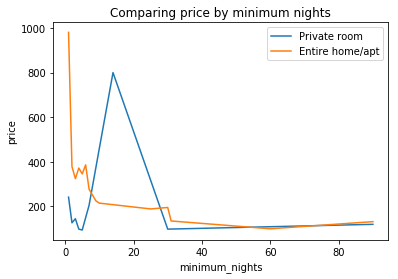

In [124]:
plt.figure(figsize=(16,4))
fig = listing_at_WesternAddition[listing_at_WesternAddition.room_type == 'Private room'][['minimum_nights','price']].groupby('minimum_nights').mean().plot()
listing_at_WesternAddition[listing_at_WesternAddition.room_type == 'Entire home/apt'][['minimum_nights','price']].groupby('minimum_nights').mean().plot(ax=fig)
plt.legend(['Private room','Entire home/apt'])
plt.ylabel('price')
plt.title('Comparing price by minimum nights')
plt.show()

In [125]:
listing_at_WesternAddition.price.unique()

array([  170,   575,   255,   110,   195,   393,   125,   132,   100,
          90,   189,   240,   135,   249,   200,   140,    89,   425,
         105,   350,   115,    95,   120,   160,   150,   130,   193,
         180,   750,   297,   310,   395,   300,   500,   495,   450,
         325,   275,   290,   155,   295,   210,   147,   185,   149,
         225,    99,   175,   700,    85,   109,   285,   156,   215,
         145,    65,    98,   399,    75,   188,   600,   128,   133,
        1850,   165,  1000,    80,  1100,   265,    94,   248,   103,
         138,   315,   134,   800,   260,   129,  2250,   360,   299,
         650,   269,   154,   550,   279,    60,   139,   119,   220,
        1500,   159,   239,   244,   179,   237,   715,   144,   199,
         233,   410,   400,   250,    56,   114,   205, 10000,   449,
         973,    79,   850,  4999,   390,    70,   348,    59,  1400,
         485,    92,   490,   499,   219,    69])

In [127]:
print('T-Test Results by price')

for price in listing_at_WesternAddition.price.unique():
    price_data = listing_at_WesternAddition[listing_at_WesternAddition.price == price]
    print(stats.ttest_ind(price_data[price_data.room_type == 'Private room'].minimum_nights,
                          price_data[price_data.room_type == 'Entire home/apt'].minimum_nights))

T-Test Results by price
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=-3.7318510263921225, pvalue=0.002864235207799042)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=-0.330724205226142, pvalue=0.7465559391659952)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indR

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)


### Conclusions

Private room listings in the 'Western Addition' neighbourhood area has more effect on airbnb business compared to other room type also if people are spending more nights at those places that also improves airbnb business over long run. There is always scope for exploring more data that matters and check what effect they have on our findings!